In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [3]:
fm = matplotlib.font_manager.fontManager
fm.addfont("./仿宋_GB2312.TTF")
fm.addfont("./times.ttf")

# 设置中文字体和负号正常显示,启用LaTeX排版
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

In [6]:
sic_10 = pd.read_excel("../data/附件/附件1.xlsx")
sic_15 = pd.read_excel("../data/附件/附件2.xlsx")
si_10 = pd.read_excel("../data/附件/附件3.xlsx")
si_15 = pd.read_excel("../data/附件/附件4.xlsx")

In [8]:
sic_10

,波数 (cm-1),反射率 (%)
0,399.6747,0.000000
1,400.1569,31.293229
2,400.6390,30.604280
3,401.1211,29.997402
4,401.6032,29.414797
...,...,...
7464,3998.1940,18.270606
7465,3998.6760,18.273895
7466,3999.1580,18.254891
7467,3999.6400,18.302167


<Axes: xlabel='波数 (cm-1)'>

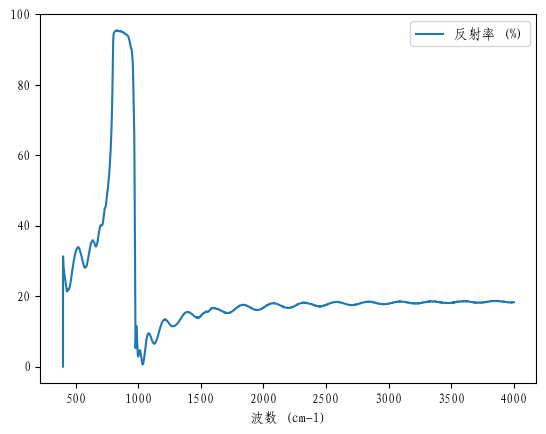

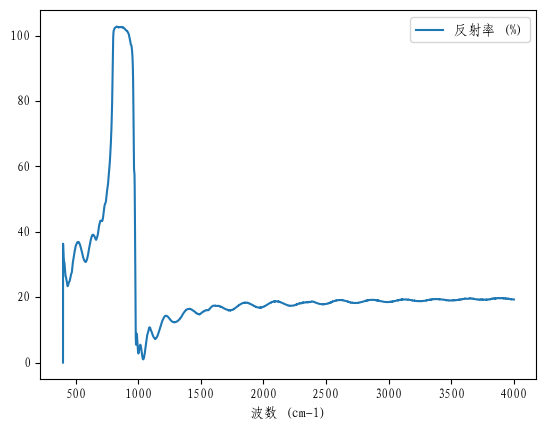

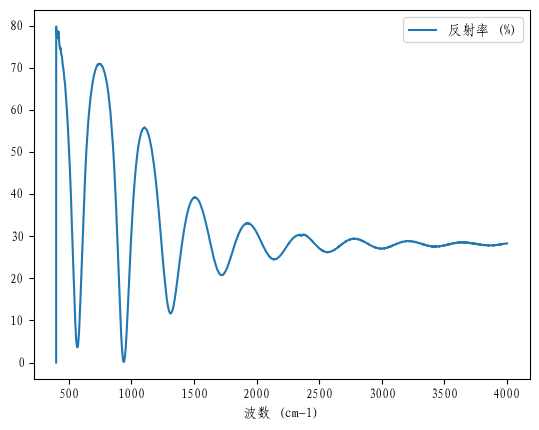

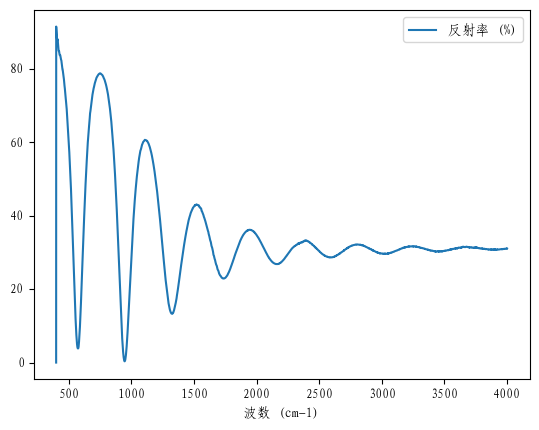

In [10]:
sic_10.plot("波数 (cm-1)")
sic_15.plot("波数 (cm-1)")
si_10.plot("波数 (cm-1)")
si_15.plot("波数 (cm-1)")